In [ ]:
pip install pandas

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
x = df.iloc[:,3:]
x

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


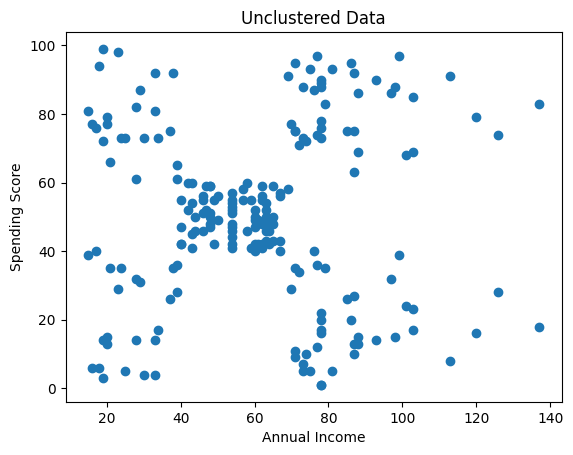

In [ ]:
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)']);

plt.title('Unclustered Data')

sns.scatterplot(x=x['Annual Income (k$)'],y=x['Spending Score (1-100)'])

x is a DataFrame containing these two columns.

In [ ]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
x.shape

(200, 2)

In [ ]:
km.fit_predict(x)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0], dtype=int32)

Using fit_predict is convenient when you want to fit the model and immediately get the predicted cluster labels without having to call fit and predict separately.

In [ ]:
km.inertia_

106348.37306211119

The attribute km.inertia_ provides the sum of squared distances between each data point and the nearest cluster centroid after the KMeans model has been fitted.

In KMeans clustering, inertia is often used as a metric to evaluate the quality of the clustering:

Lower inertia generally indicates that points are closer to their respective cluster centroids, which can suggest more compact and well-separated clusters.

Inertia is commonly used in the elbow method to help determine the optimal number of clusters.

In [ ]:
sse=[]
for k in range(1,16):
    km = KMeans(n_clusters=k)
    km.fit_predict(x)
    sse.append(km.inertia_)

This code snippet is calculating the Sum of Squared Errors (SSE) for different numbers of clusters (k) in order to apply the elbow method. The elbow method helps identify the optimal number of clusters by plotting SSE values for each k and finding the point where the SSE reduction slows down significantly (forming an "elbow").

Loop through values of k from 1 to 15:

In [ ]:
sse

[269981.28000000014,
 185917.1425392853,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 38858.959975143895,
 31577.72635585145,
 25061.304119069322,
 22143.222100767438,
 20248.174398469746,
 17775.977525252525,
 16968.805409786288,
 15156.2326923077,
 14240.611282073049,
 13234.875418100422]

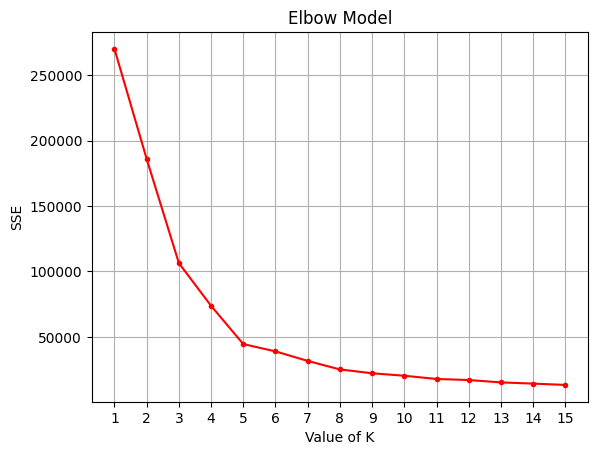

In [ ]:
plt.title('Elbow Model')
plt.xlabel('Value of K')
plt.ylabel('SSE')
plt.grid()
plt.xticks(range(1,16))
plt.plot(range(1,16),sse,marker='.',color='red');

K at 5

plt.xticks(range(1, 16)): Sets the x-axis ticks to be integers from 1 to 15, making it easier to see each cluster number.

In [ ]:
from sklearn.metrics import silhouette_score

In [ ]:
silh=[]
for k in range(2,16):
    km = KMeans(n_clusters=k)
    labels = km.fit_predict(x)
    score = silhouette_score(x,labels)
    silh.append(score)

The silhouette_score from sklearn.metrics is a useful metric for evaluating the quality of clusters formed by a clustering algorithm, such as KMeans. It provides a measure of how similar each data point is to its own cluster compared to other clusters, which helps in assessing the consistency within clusters.

How silhouette_score Works:
Range: The silhouette score ranges from -1 to 1.
A score close to 1 means that the clusters are well-defined and separated.

A score around 0 indicates overlapping clusters or points that are on the decision boundary between clusters.

A score close to -1 suggests that points may have been assigned to the wrong clusters.

Formula: For each point, the silhouette score is calculated by comparing the average distance to points in the same cluster (cohesion) with the average distance to points in the nearest neighboring cluster (separation).

In [ ]:
silh

[0.2918426367691145,
 0.46761358158775435,
 0.4931963109249047,
 0.553931997444648,
 0.5082526725498011,
 0.47852679446095336,
 0.42638821874961397,
 0.4675793019403562,
 0.43865010075435323,
 0.45456539753534914,
 0.4144394119208787,
 0.4263243388723275,
 0.39864355057622886,
 0.413695146519944]

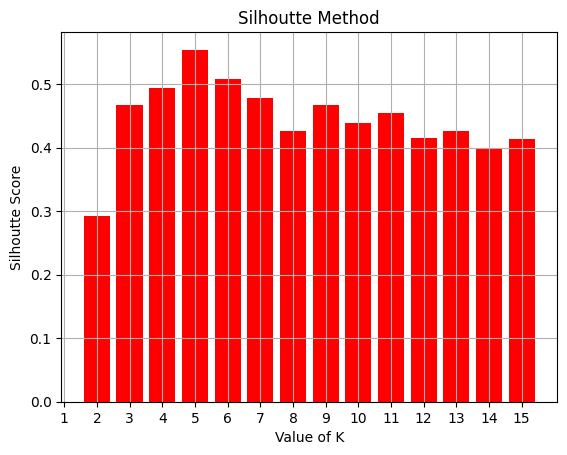

In [ ]:
plt.title('Silhoutte Method')
plt.xlabel('Value of K')
plt.ylabel('Silhoutte Score')
plt.grid()
plt.xticks(range(1,16))
plt.bar(range(2,16),silh,color='red');

Again 5

Cluster analysis with k=1: A silhouette score isn't defined for k=1 because there's only one cluster, so there’s no concept of separation (i.e., no other cluster to compare against). Silhouette scores require at least two clusters to calculate the distance between points in the same cluster and those in the nearest other cluster.

In [ ]:
km = KMeans(n_clusters=5,random_state=0)
labels = km.fit_predict(x)

In [ ]:
labels

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

In [ ]:
cent = km.cluster_centers_
cent

array([[55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [88.2       , 17.11428571],
       [26.30434783, 20.91304348],
       [25.72727273, 79.36363636]])

The line cent = km.cluster_centers_ retrieves the centroids (the center points) of the clusters that were computed by the KMeans model (km) after it has been fitted to the data.

km.cluster_centers_ is a NumPy array containing these centroid coordinates.

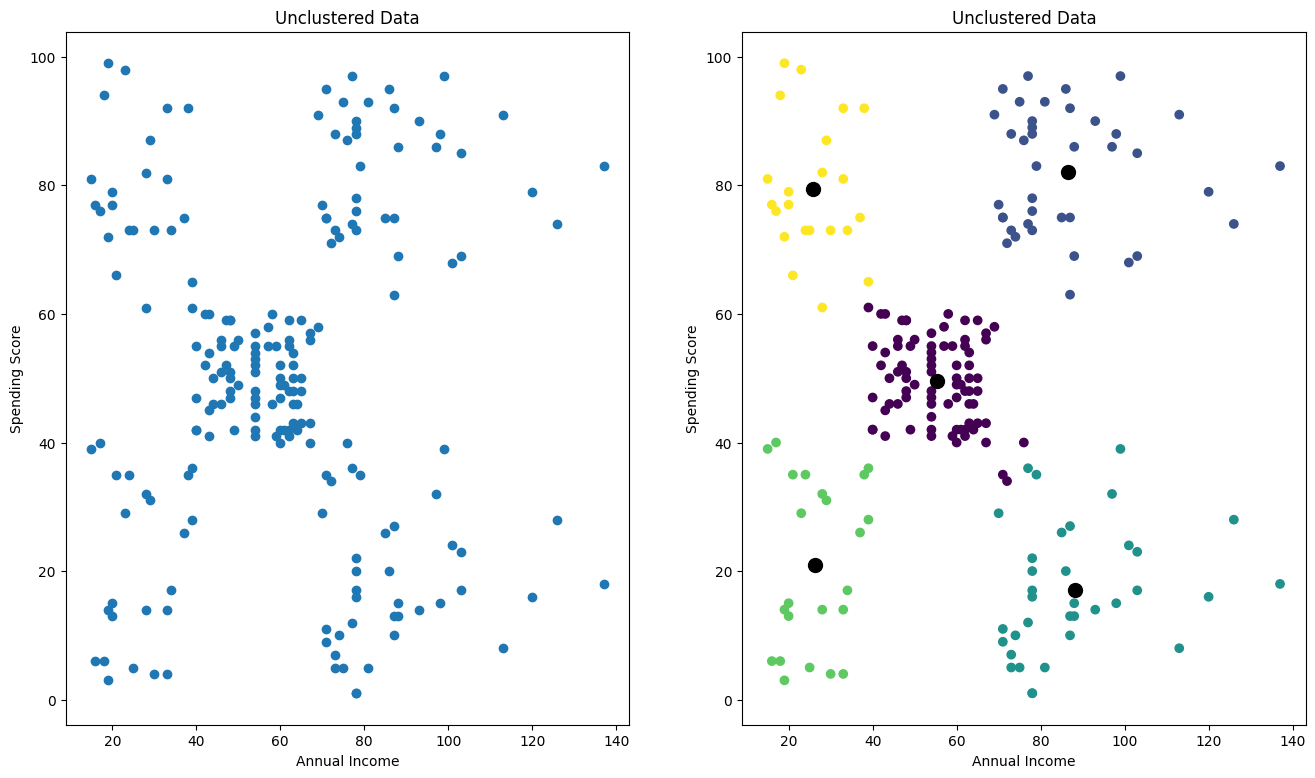

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)']);

plt.subplot(1,2,2)
plt.title('Unclustered Data')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels);
plt.scatter(cent[:,0],cent[:,1],s=100,color='k');

The plt.subplot(1, 2, 1) command is used to create a subplot in a figure, which allows you to plot multiple graphs in a single window. It divides the figure into a grid and specifies which part of the grid the current plot will appear in.

Breakdown of plt.subplot(1, 2, 1):
1: The number of rows in the grid (in this case, 1 row).
2: The number of columns in the grid (in this case, 2 columns).
1: Specifies the position of the current plot in the grid, counting from left to right, top to bottom. Here, 1 means the first plot in the grid (the left half).

c=labels: This assigns each data point a color based on the cluster label (which is an integer). Points in the same cluster will share the same color, helping you visually distinguish the different clusters.


cent[:, 0] and cent[:, 1]: These are the x and y coordinates of the centroids of the clusters. cent is a 2D array where each row represents the coordinates of a centroid,

so cent[:, 0] accesses the x-coordinates,
and cent[:, 1] accesses the y-coordinates.

s=100: Sets the size of the centroid markers to 100 for better visibility.

color='k': Specifies the color of the centroids to be black ('k').

In [ ]:
km.inertia_

44448.45544793369

In [ ]:
km.labels_

array([3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 0,
       3, 4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 0, 1, 2, 1, 2, 1,
       0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1,
       2, 1], dtype=int32)

Essentially, this filters the data points that belong to the cluster with label 4.

In [ ]:
df[labels==4]

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
1,2,Male,21,15,81
3,4,Female,23,16,77
5,6,Female,22,17,76
7,8,Female,23,18,94
9,10,Female,30,19,72
11,12,Female,35,19,99
13,14,Female,24,20,77
15,16,Male,22,20,79
17,18,Male,20,21,66
19,20,Female,35,23,98


In [ ]:
four = df[labels==4]

In [ ]:
four.to_csv('demo.csv')

In [ ]:
km.predict([[56,61]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


array([0], dtype=int32)

[[56, 61]]: This is a 2D list representing a single data point with two features. In this case, 56 could represent the "Annual Income (k$)" and 61 the "Spending Score (1-100)" of a customer.

it returns the number of cluster

In [ ]:
agl = AgglomerativeClustering(n_clusters=5)

Agglomerative Clustering is a type of hierarchical clustering algorithm that builds a tree of clusters by progressively merging the closest pairs of clusters. It is a bottom-up approach, as opposed to KMeans, which is top-down.

Key Points About Agglomerative Clustering:
Hierarchical Clustering: Agglomerative Clustering is a hierarchical method that starts with each data point as its own cluster and progressively merges the closest clusters based on a distance metric (like Euclidean distance).

n_clusters=5: This specifies that the algorithm should continue merging clusters until there are exactly 5 clusters. You can set this value based on your desired number of clusters.

No Need to Predefine Number of Clusters: Unlike KMeans, Agglomerative Clustering doesn’t require you to predefine the number of clusters upfront. However, by setting n_clusters, you force it to stop merging when the desired number of clusters is reached.

In [ ]:
alabels=agl.fit_predict(x)
alabels

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

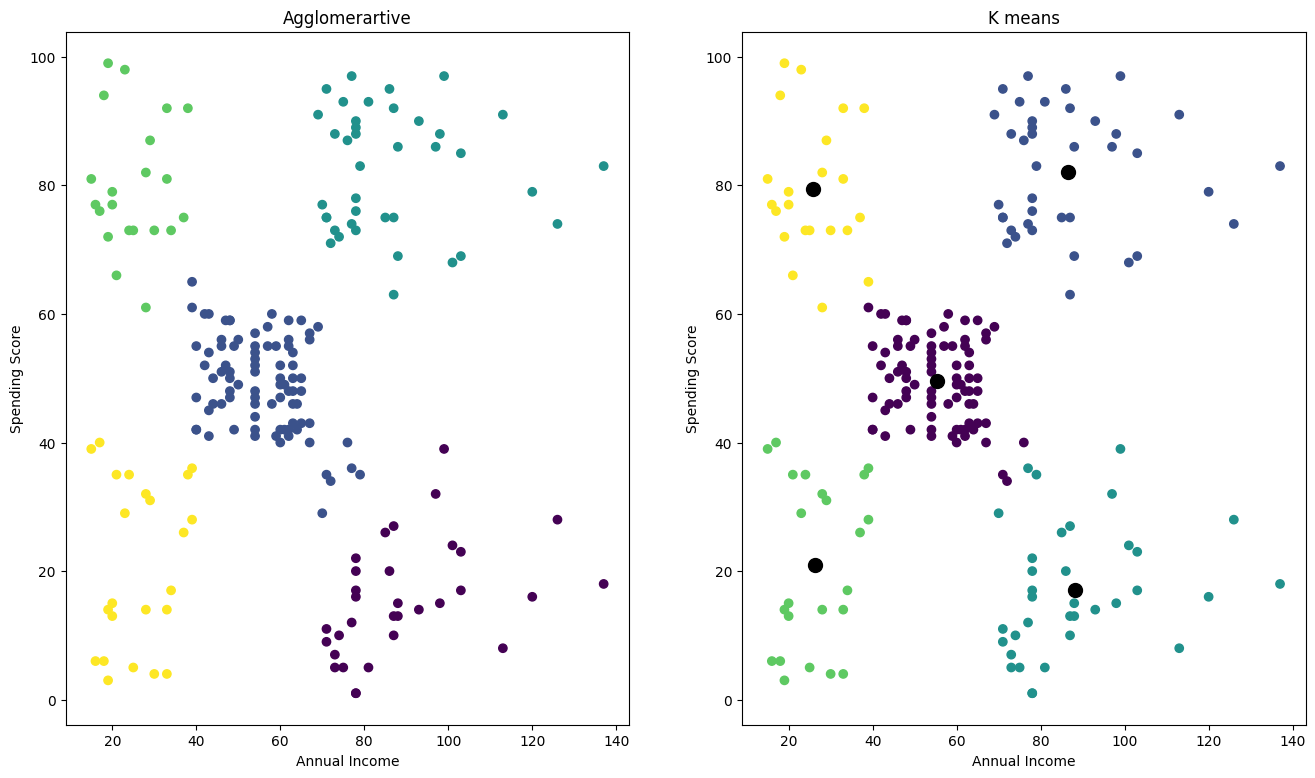

In [ ]:
plt.figure(figsize=(16,9))
plt.subplot(1,2,1)
plt.title('Agglomerartive')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=alabels);

plt.subplot(1,2,2)
plt.title('K means')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.scatter(x['Annual Income (k$)'],x['Spending Score (1-100)'],c=labels);
plt.scatter(cent[:,0],cent[:,1],s=100,color='k');